In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from datetime import datetime


In [2]:
num_weeks = 26

#initialise the date for the first week of the dataset (week ending on start_date)
filedate = pd.Timestamp('2021-02-27 00:00:00')


#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week by linking the right format of the dates to turnstile_{}.txt
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    MTA_data_covid_after = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(MTA_data_covid_after)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

MTA_data_covid_after= pd.concat(filelist, axis=0, ignore_index=True)


In [4]:
MTA_data_covid_after

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994
...,...,...,...,...,...,...,...,...,...,...,...
5441221,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,05:00:00,REGULAR,5554,613
5441222,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,09:00:00,REGULAR,5554,613
5441223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,13:00:00,REGULAR,5554,613
5441224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,17:00:00,REGULAR,5554,613


In [6]:
MTA_data_covid_after.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [7]:
MTA_data_covid_after.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994


In [8]:
MTA_data_covid_after.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
5441221,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,05:00:00,REGULAR,5554,613
5441222,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,09:00:00,REGULAR,5554,613
5441223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,13:00:00,REGULAR,5554,613
5441224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,17:00:00,REGULAR,5554,613
5441225,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,21:00:00,REGULAR,5554,613


In [9]:
MTA_data_covid_after.shape

(5441226, 11)

In [11]:
MTA_data_covid_after.describe()

,ENTRIES,EXITS
count,5.441226e+06,5.441226e+06
mean,4.183332e+07,3.352681e+07
std,2.185065e+08,1.928367e+08
min,0.000000e+00,0.000000e+00
25%,2.181362e+05,9.547400e+04
50%,1.433266e+06,8.640120e+05
75%,6.068226e+06,3.999730e+06
max,2.147432e+09,2.123017e+09


In [12]:
MTA_data_covid_after["TURNSTILE"] = MTA_data_covid_after["C/A"]+"-"+MTA_data_covid_after["UNIT"]+"-"+MTA_data_covid_after["SCP"]
MTA_data_covid_after.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,23:00:00,REGULAR,7534197,2569013,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-21,03:00:00,REGULAR,7534200,2569015,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-21,07:00:00,REGULAR,7534206,2569020,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-21,11:00:00,REGULAR,7534215,2569053,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-21,15:00:00,REGULAR,7534281,2569077,A002-R051-02-00-00


In [13]:
MTA_data_covid_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'TURNSTILE'],
      dtype='object')

In [14]:
MTA_data_covid_after.drop_duplicates(subset=None, keep="first", inplace=True)
MTA_data_covid_after


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...
5441221,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,05:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01
5441222,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,09:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01
5441223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,13:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01
5441224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,17:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01


In [16]:
MTA_data_covid_after.columns = [column.strip() for column in MTA_data_covid_after.columns]
MTA_data_covid_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TURNSTILE'],
      dtype='object')

In [17]:
MTA_data_covid_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441226 entries, 0 to 5441225
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 539.7+ MB


In [18]:
MTA_data_covid_after['HOUR'] = MTA_data_covid_after['TIME'].apply(lambda x:int(x[:2]))
MTA_data_covid_after

MTA_data_covid_after['DATE'] = pd.to_datetime(MTA_data_covid_after['DATE'])

MTA_data_covid_after['Datetime'] = MTA_data_covid_after['DATE'] + pd.to_timedelta(MTA_data_covid_after['HOUR'], unit='H')

In [19]:
MTA_data_covid_after

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869,A002-R051-02-00-00,3,2021-02-20 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881,A002-R051-02-00-00,7,2021-02-20 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925,A002-R051-02-00-00,11,2021-02-20 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965,A002-R051-02-00-00,15,2021-02-20 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994,A002-R051-02-00-00,19,2021-02-20 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441221,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,05:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,5,2021-08-20 05:00:00
5441222,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,09:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,9,2021-08-20 09:00:00
5441223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,13:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,13,2021-08-20 13:00:00
5441224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,17:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,17,2021-08-20 17:00:00


In [20]:
MTA_data_covid_after["NAMEOFDAY"]= MTA_data_covid_after["Datetime"].dt.day_name()

#Checking sample 5 rows
MTA_data_covid_after

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,HOUR,Datetime,NAMEOFDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,03:00:00,REGULAR,7533822,2568869,A002-R051-02-00-00,3,2021-02-20 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,07:00:00,REGULAR,7533826,2568881,A002-R051-02-00-00,7,2021-02-20 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,11:00:00,REGULAR,7533854,2568925,A002-R051-02-00-00,11,2021-02-20 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,15:00:00,REGULAR,7533940,2568965,A002-R051-02-00-00,15,2021-02-20 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-20,19:00:00,REGULAR,7534089,2568994,A002-R051-02-00-00,19,2021-02-20 19:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441221,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,05:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,5,2021-08-20 05:00:00,Friday
5441222,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,09:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,9,2021-08-20 09:00:00,Friday
5441223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,13:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,13,2021-08-20 13:00:00,Friday
5441224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-20,17:00:00,REGULAR,5554,613,TRAM2-R469-00-05-01,17,2021-08-20 17:00:00,Friday


In [21]:
MTA_data_covid_after = MTA_data_covid_after[["STATION","TURNSTILE","DATE","TIME","Datetime","NAMEOFDAY","ENTRIES","EXITS"]]
MTA_data_covid_after

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,2021-02-20,03:00:00,2021-02-20 03:00:00,Saturday,7533822,2568869
1,59 ST,A002-R051-02-00-00,2021-02-20,07:00:00,2021-02-20 07:00:00,Saturday,7533826,2568881
2,59 ST,A002-R051-02-00-00,2021-02-20,11:00:00,2021-02-20 11:00:00,Saturday,7533854,2568925
3,59 ST,A002-R051-02-00-00,2021-02-20,15:00:00,2021-02-20 15:00:00,Saturday,7533940,2568965
4,59 ST,A002-R051-02-00-00,2021-02-20,19:00:00,2021-02-20 19:00:00,Saturday,7534089,2568994
...,...,...,...,...,...,...,...,...
5441221,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2021-08-20,05:00:00,2021-08-20 05:00:00,Friday,5554,613
5441222,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2021-08-20,09:00:00,2021-08-20 09:00:00,Friday,5554,613
5441223,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2021-08-20,13:00:00,2021-08-20 13:00:00,Friday,5554,613
5441224,RIT-ROOSEVELT,TRAM2-R469-00-05-01,2021-08-20,17:00:00,2021-08-20 17:00:00,Friday,5554,613


In [22]:
MTA_data_covid_after["TURNSTILE"].unique()

array(['A002-R051-02-00-00', 'A002-R051-02-00-01', 'A002-R051-02-03-00',
       ..., 'R520-R223-01-03-00', 'R520-R223-01-03-01',
       'PTH19-R549-02-02-08'], dtype=object)

In [23]:
print("Maximum date: ")
print(MTA_data_covid_after["Datetime"].max())
print()
print("Minimum date: ")
print(MTA_data_covid_after["Datetime"].min())

Maximum date: 
2021-08-20 23:00:00

Minimum date: 
2021-02-20 00:00:00


In [24]:
len(MTA_data_covid_after["STATION"].unique())

379

In [25]:
len(MTA_data_covid_after["TURNSTILE"].unique())

5066

In [26]:
print("Row count based on stations (First 10 rows)")
print(MTA_data_covid_after["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     111168
FULTON ST          104778
GRD CNTRL-42 ST     97150
23 ST               79717
86 ST               71006
CANAL ST            63296
59 ST               61187
CHAMBERS ST         60164
34 ST-HERALD SQ     59064
ATL AV-BARCLAY      56140
Name: STATION, dtype: int64


In [27]:
MTA_data_covid_after.min()

STATION                     1 AV
TURNSTILE     A002-R051-02-00-00
DATE         2021-02-20 00:00:00
TIME                    00:00:00
Datetime     2021-02-20 00:00:00
NAMEOFDAY                 Friday
ENTRIES                        0
EXITS                          0
dtype: object

In [28]:
MTA_data_covid_after.groupby('STATION').min()

,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
STATION,,,,,,,
1 AV,H007-R248-00-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,1,0
103 ST,N037-R314-00-00-00,2021-02-20,00:00:00,2021-02-20 00:00:00,Friday,37854,28393
103 ST-CORONA,R529-R208-00-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,199954,250709
104 ST,J034-R007-00-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,26,13
110 ST,R253-R181-00-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,4459972,1699077
...,...,...,...,...,...,...,...
WOODLAWN,R294-R052-00-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,504252,111024
WORLD TRADE CTR,N094-R029-01-00-00,2021-02-20,00:00:00,2021-02-20 03:00:00,Friday,831,9
WTC-CORTLANDT,R106-R305-01-00-00,2021-02-20,00:00:00,2021-02-20 00:00:00,Friday,2,0


In [29]:
gb = MTA_data_covid_after.groupby('STATION')
gb_aggs = gb.agg({'ENTRIES': 'min', 'EXITS': 'min',})
gb_aggs

,ENTRIES,EXITS
STATION,,
1 AV,1,0
103 ST,37854,28393
103 ST-CORONA,199954,250709
104 ST,26,13
110 ST,4459972,1699077
...,...,...
WOODLAWN,504252,111024
WORLD TRADE CTR,831,9
WTC-CORTLANDT,2,0


In [30]:
MTA_data_covid_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441226 entries, 0 to 5441225
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   STATION    object        
 1   TURNSTILE  object        
 2   DATE       datetime64[ns]
 3   TIME       object        
 4   Datetime   datetime64[ns]
 5   NAMEOFDAY  object        
 6   ENTRIES    int64         
 7   EXITS      int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 373.6+ MB


In [33]:
data1 = MTA_data_covid_after[(MTA_data_covid_after["TURNSTILE"]=="N037-R314-00-00-00") &(MTA_data_covid_after['DATE']> '2021-02-27') & (MTA_data_covid_after['DATE'] <= '2021-04-29')]
data1

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
259458,103 ST,N037-R314-00-00-00,2021-02-28,00:00:00,2021-02-28 00:00:00,Sunday,14912538,11823209
259459,103 ST,N037-R314-00-00-00,2021-02-28,04:00:00,2021-02-28 04:00:00,Sunday,14912542,11823227
259460,103 ST,N037-R314-00-00-00,2021-02-28,08:00:00,2021-02-28 08:00:00,Sunday,14912565,11823248
259461,103 ST,N037-R314-00-00-00,2021-02-28,12:00:00,2021-02-28 12:00:00,Sunday,14912646,11823328
259462,103 ST,N037-R314-00-00-00,2021-02-28,16:00:00,2021-02-28 16:00:00,Sunday,14912780,11823420
...,...,...,...,...,...,...,...,...
1931912,103 ST,N037-R314-00-00-00,2021-04-29,05:00:00,2021-04-29 05:00:00,Thursday,14954485,11861352
1931913,103 ST,N037-R314-00-00-00,2021-04-29,09:00:00,2021-04-29 09:00:00,Thursday,14954674,11861488
1931914,103 ST,N037-R314-00-00-00,2021-04-29,13:00:00,2021-04-29 13:00:00,Thursday,14954874,11861641
1931915,103 ST,N037-R314-00-00-00,2021-04-29,17:00:00,2021-04-29 17:00:00,Thursday,14955133,11861840


In [34]:
data1["TURNSTILE"].max()

'N037-R314-00-00-00'

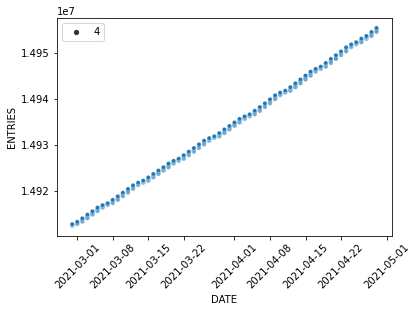

In [35]:
ax = sns.scatterplot(x="DATE", y="ENTRIES", data=data1 ,size=4)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

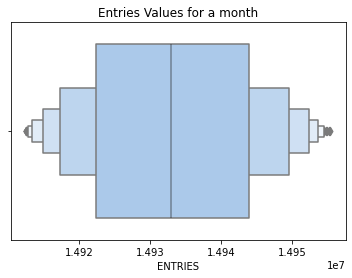

In [36]:
ax = sns.boxenplot(x='ENTRIES', data=data1,palette="pastel").set(xlabel='ENTRIES',title="Entries Values for a month")

In [38]:
mta_entries = MTA_data_covid_after.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - MTA_data_covid_after.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = MTA_data_covid_after.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - MTA_data_covid_after.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()



In [39]:
mta_entries = MTA_data_covid_after.ENTRIES.reset_index()

mta_exits =MTA_data_covid_after.EXITS.reset_index()


In [41]:
mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits["STATION"]=MTA_data_covid_after["STATION"]

mta_entries_exits["NAMEOFDAY"]=MTA_data_covid_after["NAMEOFDAY"]

mta_entries_exits

,index,ENTRIES,EXITS,TRAFFIC,STATION,NAMEOFDAY
0,0,7533822,2568869,10102691,59 ST,Saturday
1,1,7533826,2568881,10102707,59 ST,Saturday
2,2,7533854,2568925,10102779,59 ST,Saturday
3,3,7533940,2568965,10102905,59 ST,Saturday
4,4,7534089,2568994,10103083,59 ST,Saturday
...,...,...,...,...,...,...
5441221,5441221,5554,613,6167,RIT-ROOSEVELT,Friday
5441222,5441222,5554,613,6167,RIT-ROOSEVELT,Friday
5441223,5441223,5554,613,6167,RIT-ROOSEVELT,Friday
5441224,5441224,5554,613,6167,RIT-ROOSEVELT,Friday


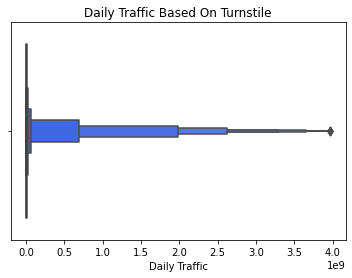

In [42]:
ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


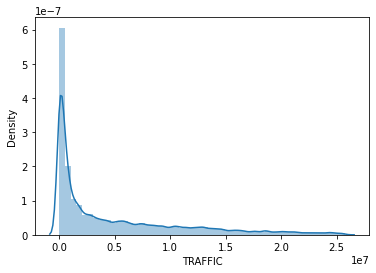

In [43]:
mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

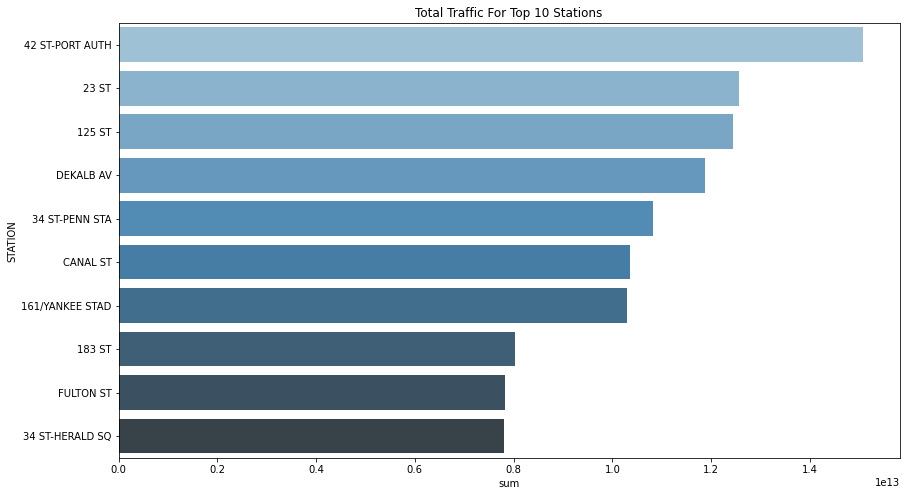

In [44]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = mta_entries_exits.groupby(['STATION']).TRAFFIC.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

In [45]:
mta_top10 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(10)
mta_top10

,index,ENTRIES,EXITS,TRAFFIC
STATION,,,,
42 ST-PORT AUTH,148836482023,8244417594317,6821751056345,15066168650662
23 ST,216259581798,6262877249262,6310833918716,12573711167978
125 ST,125955298338,7027816072717,5410401616840,12438217689557
DEKALB AV,60620500128,7119288994921,4765159956080,11884448951001
34 ST-PENN STA,300761513401,5166589285624,5649262042488,10815851328112
CANAL ST,168007651656,4415540095716,5941977278785,10357517374501
161/YANKEE STAD,110751870315,5251475230082,5043083150925,10294558381007
183 ST,12171255366,5025953543494,3009416326926,8035369870420
FULTON ST,283475502808,3497805515121,4327276645491,7825082160612


In [46]:
mta_busiest_day = mta_entries_exits.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,NAMEOFDAY,index,ENTRIES,EXITS,TRAFFIC
0,Friday,2116939655045,32614432468979,26097069644284,58711502113263
1,Monday,2115208116815,32568461039686,26102143451993,58670604491679
2,Tuesday,2118000702340,32566246486312,26096639411336,58662885897648
3,Thursday,2116664214773,32537598291120,26071284727916,58608883019036
4,Saturday,2116222139901,32493328634708,26084222001647,58577550636355
5,Wednesday,2111965050476,32476755486969,26027250118422,58504005605391
6,Sunday,2108467591575,32367714488169,25948364584788,58316079072957


In [47]:
mta_top10

,index,ENTRIES,EXITS,TRAFFIC
STATION,,,,
42 ST-PORT AUTH,148836482023,8244417594317,6821751056345,15066168650662
23 ST,216259581798,6262877249262,6310833918716,12573711167978
125 ST,125955298338,7027816072717,5410401616840,12438217689557
DEKALB AV,60620500128,7119288994921,4765159956080,11884448951001
34 ST-PENN STA,300761513401,5166589285624,5649262042488,10815851328112
CANAL ST,168007651656,4415540095716,5941977278785,10357517374501
161/YANKEE STAD,110751870315,5251475230082,5043083150925,10294558381007
183 ST,12171255366,5025953543494,3009416326926,8035369870420
FULTON ST,283475502808,3497805515121,4327276645491,7825082160612


In [48]:
mta_top10 = mta_entries_exits.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top10 = mta_top10.reset_index()

mta_top10 = mta_top10[(mta_top10["STATION"]=="42 ST-PORT AUTH") 
                  | (mta_top10["STATION"]=="23 ST")
                  | (mta_top10["STATION"]=='125 ST')
                  | (mta_top10["STATION"]=='DEKALB AV')
                  | (mta_top10["STATION"]=="34 ST-PENN STA")
                  | (mta_top10["STATION"]=="CANAL ST")
                  | (mta_top10["STATION"]=="161/YANKEE STAD")
                  | (mta_top10["STATION"]=="183 ST")
                  | (mta_top10["STATION"]=="FULTON ST")
                  | (mta_top10["STATION"]=="34 ST-HERALD SQ")]


mta_top10 = mta_top10.reset_index()

mta_top10

,level_0,STATION,NAMEOFDAY,index,ENTRIES,EXITS,TRAFFIC
0,63,125 ST,Friday,18153815698,1018008957561,791502925836,1809511883397
1,64,125 ST,Monday,17919784061,1000078507422,766936967175,1767015474597
2,65,125 ST,Saturday,17946735069,996340826442,762897169599,1759237996041
3,66,125 ST,Sunday,17956699296,1000189284246,766957496154,1767146780400
4,67,125 ST,Thursday,17959922408,1007418233331,779577556165,1786995789496
...,...,...,...,...,...,...,...
65,1584,FULTON ST,Saturday,40451113301,499324401054,618460715457,1117785116511
66,1585,FULTON ST,Sunday,40439200788,499627972099,618421972396,1118049944495
67,1586,FULTON ST,Thursday,40451850493,498976339398,616648747167,1115625086565
68,1587,FULTON ST,Tuesday,40554586204,500279097191,619041422842,1119320520033


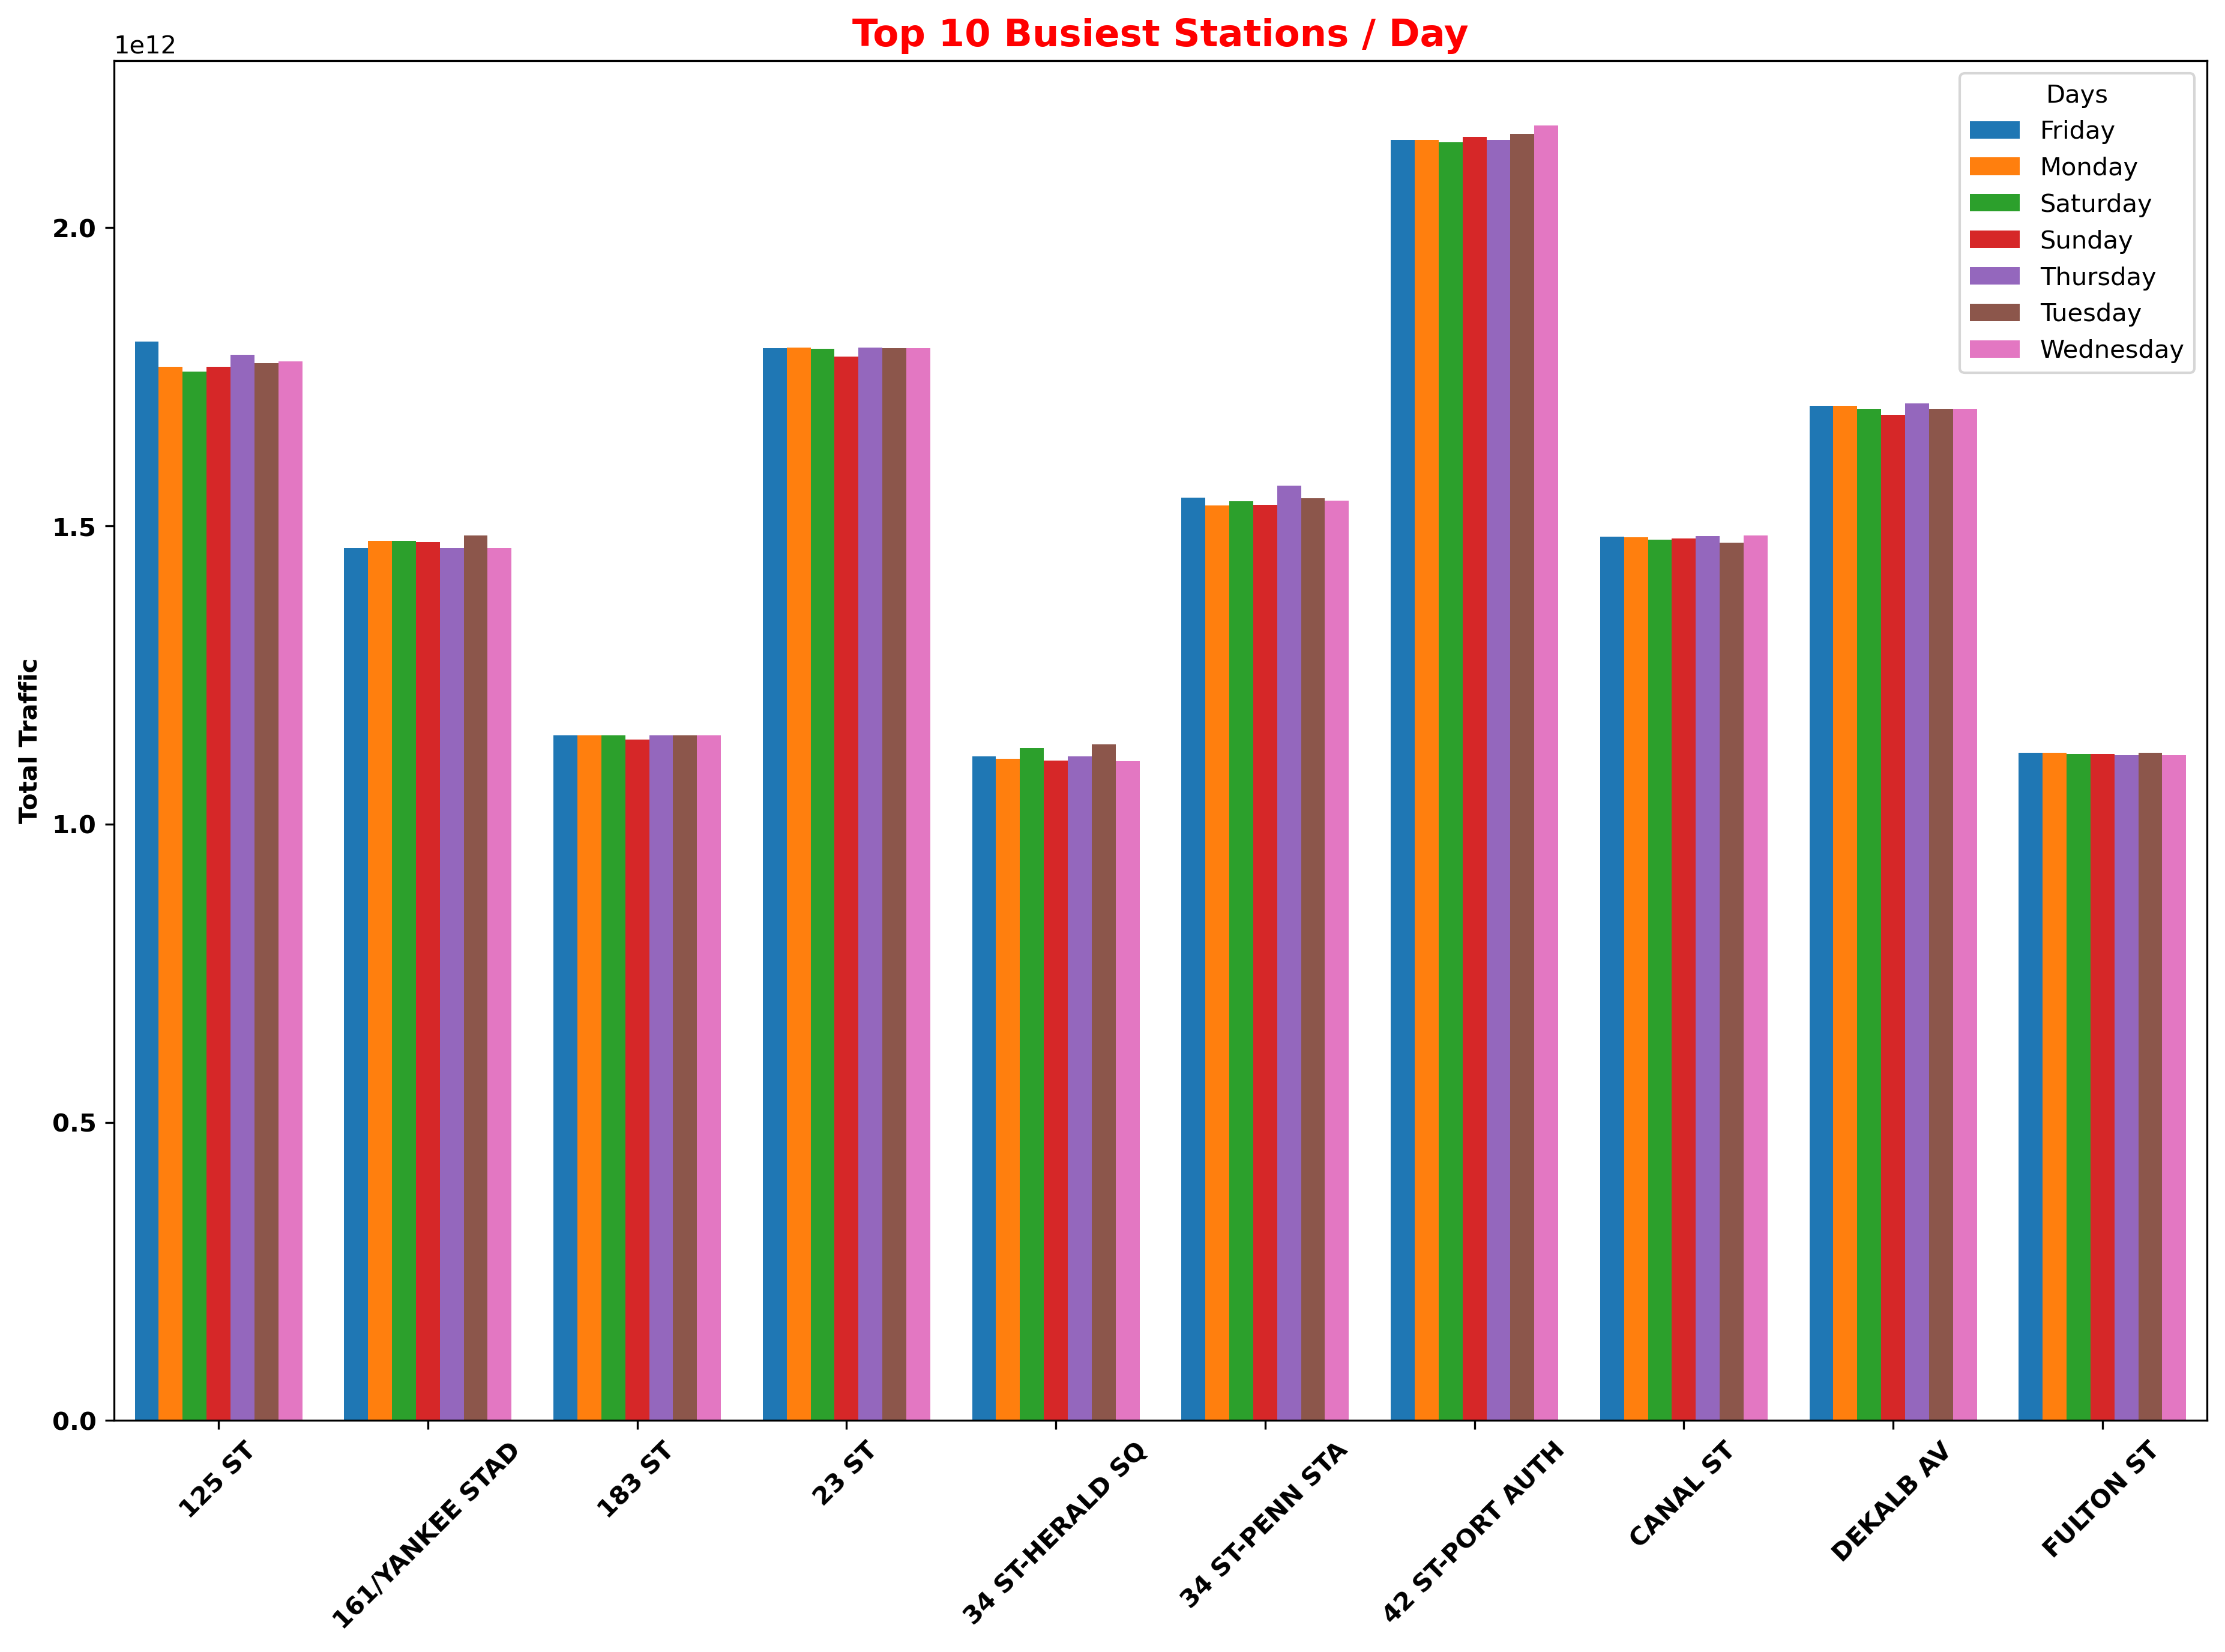

In [49]:
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top10, saturation=1)
plt.title("Top 10 Busiest Stations / Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


In [50]:
mta_top10_heatmap = mta_top10.groupby(["STATION","NAMEOFDAY"]).TRAFFIC.mean().reset_index()

mta_top10_heatmap = mta_top10_heatmap.pivot("NAMEOFDAY","STATION","TRAFFIC")

mta_top10_heatmap = mta_top10_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_heatmap

STATION,125 ST,161/YANKEE STAD,183 ST,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,CANAL ST,DEKALB AV,FULTON ST
NAMEOFDAY,,,,,,,,,,
Monday,1767015474597,1475007399748,1148961266169,1798713508780,1109466297159,1534490694047,2147018669548,1480561870983,1701224812550,1119446603017
Tuesday,1772746221201,1484135089171,1148961994376,1798557785936,1133999199250,1546656837948,2156967795690,1471904413887,1696804172274,1119320520033
Wednesday,1775563544425,1462483185370,1148962755689,1798342265384,1105658185480,1542523732357,2171201972300,1483957733276,1696806497792,1115681697423
Thursday,1786995789496,1462496999980,1148963518433,1798613005625,1113495489802,1567414152943,2147476682531,1482587051253,1705655264198,1115625086565
Friday,1809511883397,1462451921643,1148964274213,1798333662638,1113444079311,1547866650330,2147511610017,1482026434137,1701235383111,1119173192568
Saturday,1759237996041,1475011270961,1148960195007,1797516283892,1127367482304,1541597302273,2143288550542,1477429994237,1696798602349,1117785116511
Sunday,1767146780400,1472972514134,1141595866533,1783634655723,1106801977177,1535301958214,2152703370034,1479049876728,1685924218727,1118049944495


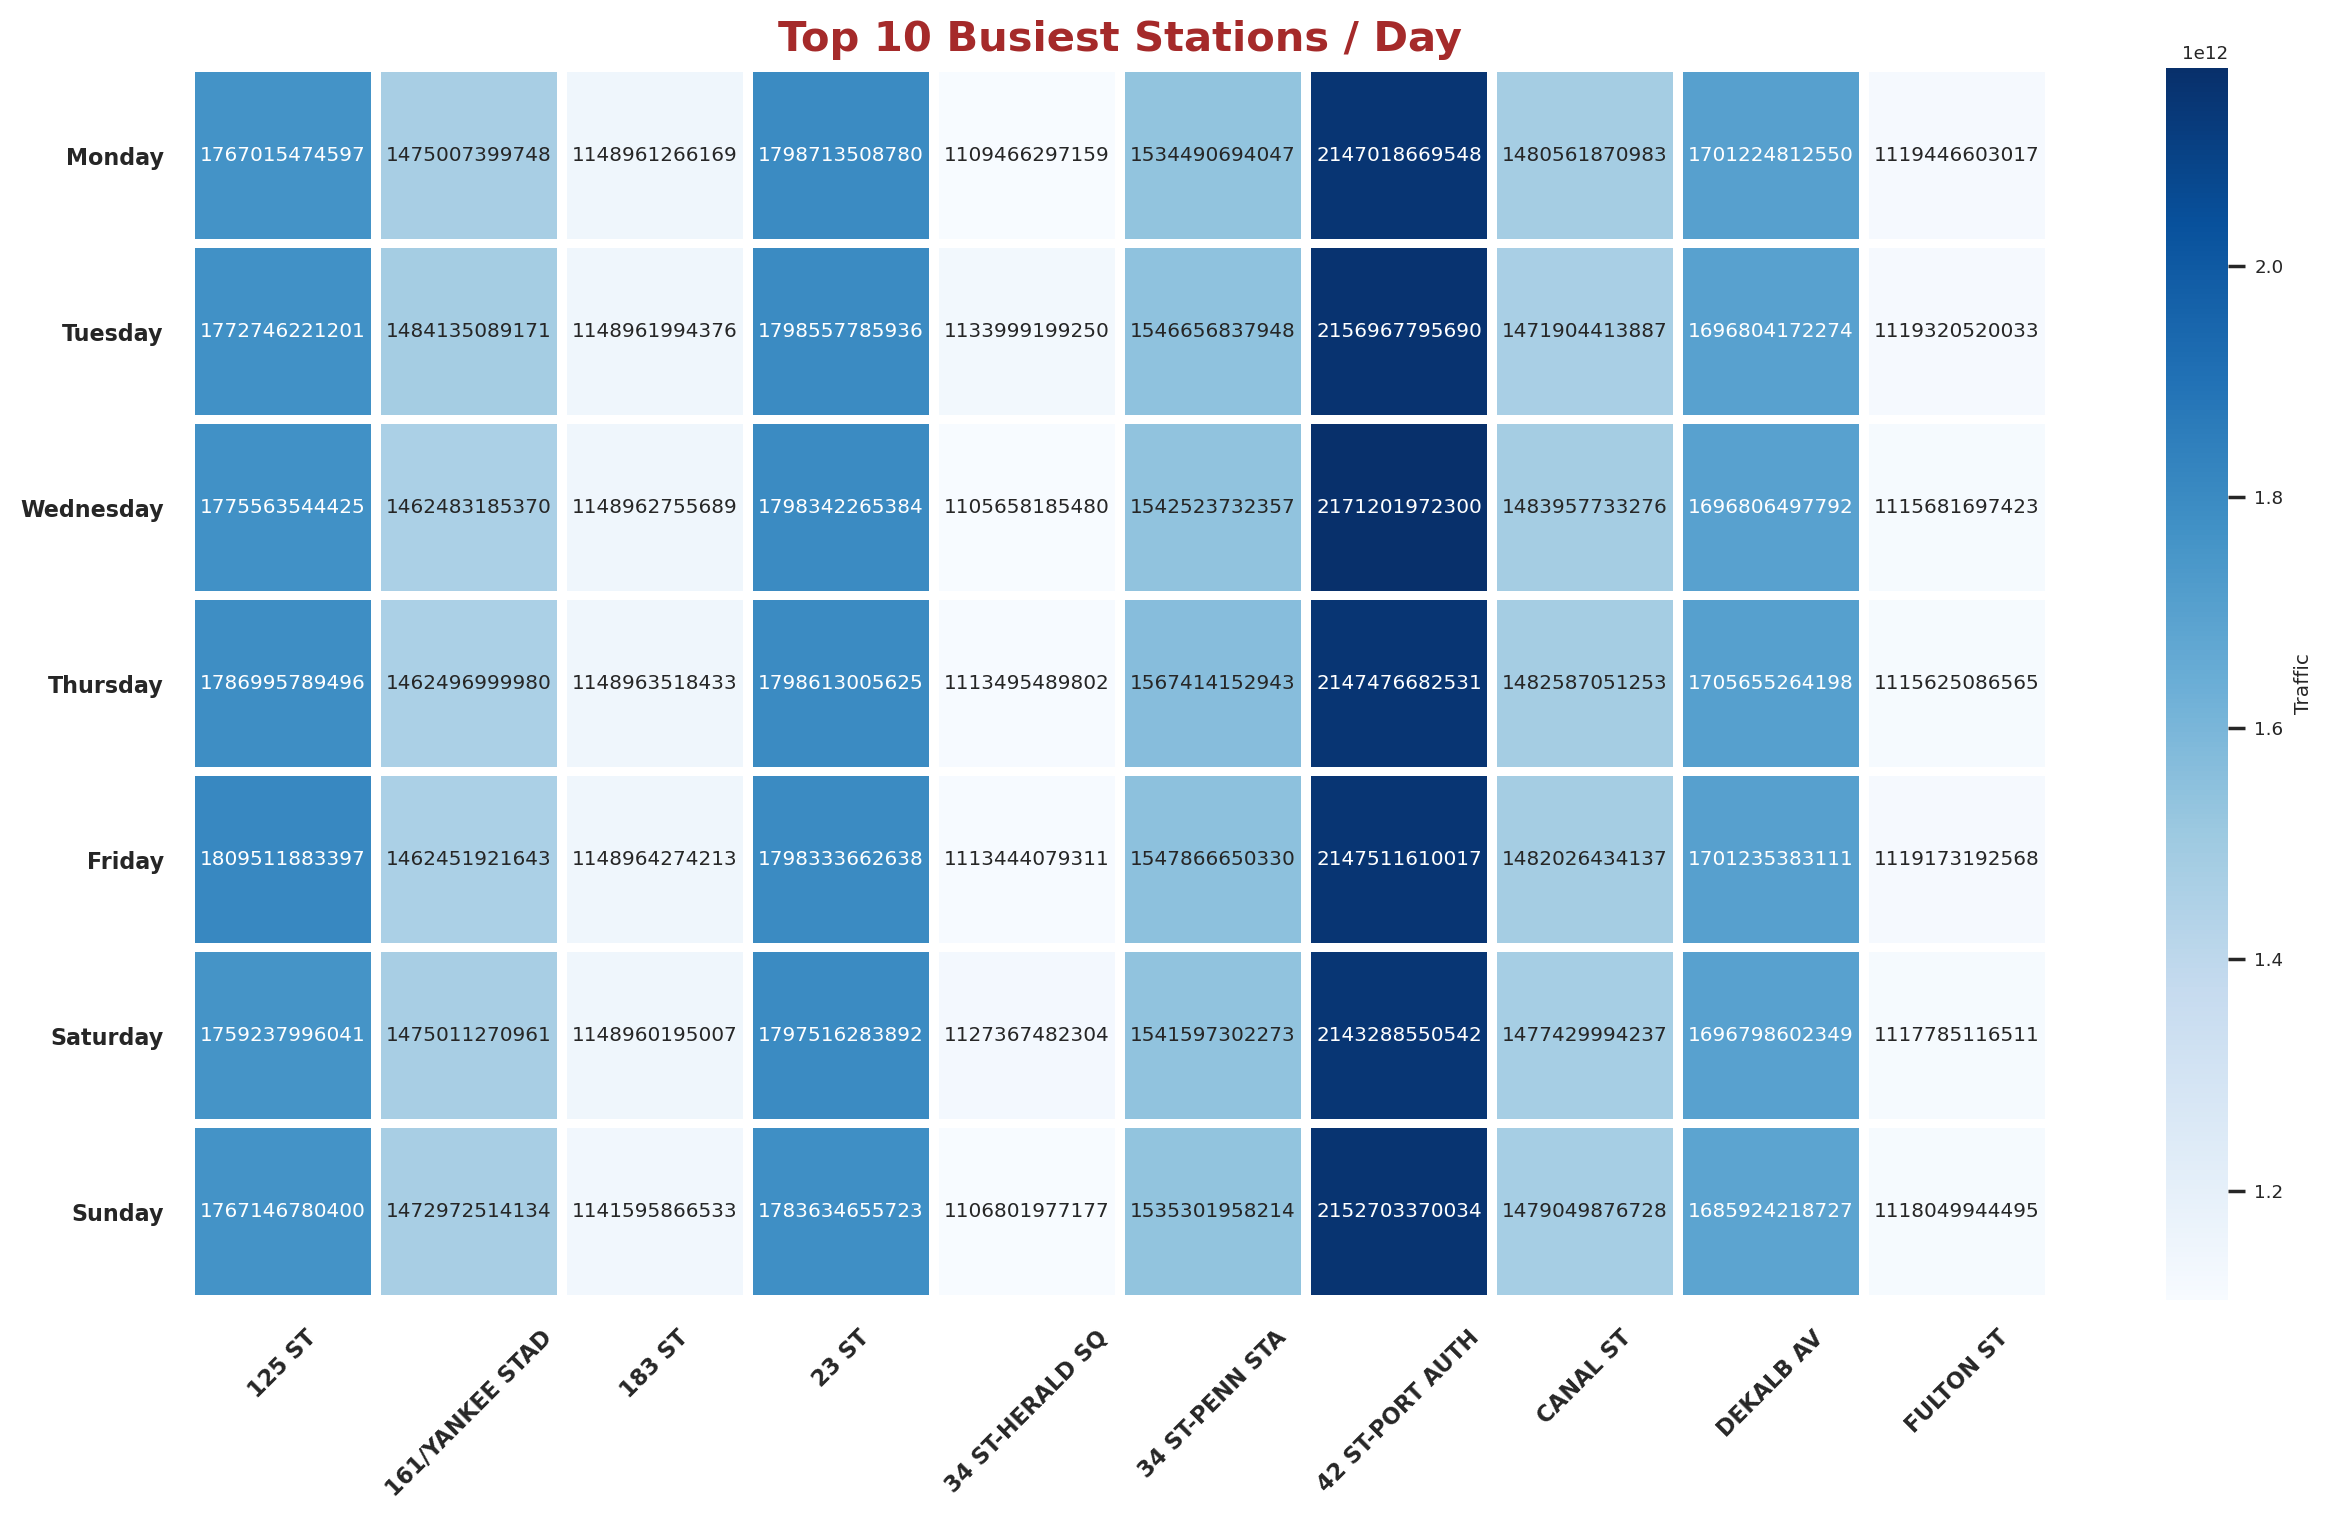

In [51]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=0.6)
sns.heatmap(mta_top10_heatmap,annot=True,fmt="d", linewidths=3, cmap="Blues",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("Top 10 Busiest Stations / Day",weight="bold",c="brown", fontsize=15)
plt.show()


In [53]:
mta_time = MTA_data_covid_after.sort_values(["STATION","TURNSTILE","Datetime"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.sample(30)

,index,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
3225445,1375146,EXCHANGE PLACE,PTH05-R543-00-04-00,2021-04-03,21:38:07,2021-04-03 21:00:00,Saturday,36367,7704,2.0,0.0
3954880,3830796,JAY ST-METROTEC,N103-R127-00-00-06,2021-06-30,20:00:00,2021-06-30 20:00:00,Wednesday,2952921,4496252,32.0,81.0
4317514,1029234,METS-WILLETS PT,R532-R328-00-05-05,2021-03-26,21:00:00,2021-03-26 21:00:00,Friday,415360,43708,0.0,0.0
4536153,2835930,NEWARK HW BMEBE,PTH01-R549-00-00-03,2021-05-25,03:10:40,2021-05-25 03:00:00,Tuesday,19826,1964,0.0,0.0
4231685,3040616,LEXINGTON AV/63,N601A-R319-01-05-00,2021-06-01,04:00:00,2021-06-01 04:00:00,Tuesday,1601,0,0.0,0.0
2831413,850336,CHURCH AV,B015-R098-01-06-00,2021-03-20,04:00:00,2021-03-20 04:00:00,Saturday,246218,1583405,0.0,1.0
2136133,4593764,ATL AV-BARCLAY,R610-R057-00-04-04,2021-07-18,12:00:00,2021-07-18 12:00:00,Sunday,22105,14032,8.0,7.0
1172443,473977,42 ST-PORT AUTH,N063A-R011-00-00-02,2021-03-11,03:00:00,2021-03-11 03:00:00,Thursday,242118018,224912989,36.0,57.0
694423,1621203,23 ST,R226-R131-02-06-00,2021-04-14,01:00:00,2021-04-14 01:00:00,Wednesday,591364,0,0.0,0.0
3052448,5225271,CROWN HTS-UTICA,R626-R062-00-03-01,2021-08-09,12:00:00,2021-08-09 12:00:00,Monday,4888186,2905392,184.0,90.0


In [55]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
46860
Negative values for DIF_EXITS column:
32960


In [57]:
mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())

<ipython-input-57-b87f076ba30e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
<ipython-input-57-b87f076ba30e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())


In [58]:
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median()) 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median())

<ipython-input-58-75217c12b809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median())
<ipython-input-58-75217c12b809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median())


In [59]:
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    5.441226e+06
mean     4.103883e+01
std      5.045740e+01
min      0.000000e+00
25%      3.000000e+00
50%      2.300000e+01
75%      6.100000e+01
max      2.200000e+02
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    5.441226e+06
mean     4.421041e+01
std      5.436587e+01
min      0.000000e+00
25%      4.000000e+00
50%      2.500000e+01
75%      6.300000e+01
max      2.480000e+02
Name: DIF_EXITS, dtype: float64


In [60]:
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time

,index,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,32882,1 AV,H007-R248-00-00-00,2021-02-20,03:00:00,2021-02-20 03:00:00,Saturday,15529831,17640237,0.0,0.0,0.0
1,32883,1 AV,H007-R248-00-00-00,2021-02-20,07:00:00,2021-02-20 07:00:00,Saturday,15529836,17640309,5.0,72.0,77.0
2,32884,1 AV,H007-R248-00-00-00,2021-02-20,11:00:00,2021-02-20 11:00:00,Saturday,15529863,17640553,27.0,244.0,271.0
3,32885,1 AV,H007-R248-00-00-00,2021-02-20,15:00:00,2021-02-20 15:00:00,Saturday,15529927,17640925,64.0,25.0,89.0
4,32886,1 AV,H007-R248-00-00-00,2021-02-20,19:00:00,2021-02-20 19:00:00,Saturday,15530031,17641262,104.0,25.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5441221,5415494,ZEREGA AV,R419-R326-00-05-01,2021-08-20,05:00:00,2021-08-20 05:00:00,Friday,39,182,0.0,0.0,0.0
5441222,5415495,ZEREGA AV,R419-R326-00-05-01,2021-08-20,09:00:00,2021-08-20 09:00:00,Friday,39,182,0.0,0.0,0.0
5441223,5415496,ZEREGA AV,R419-R326-00-05-01,2021-08-20,13:00:00,2021-08-20 13:00:00,Friday,39,182,0.0,0.0,0.0
5441224,5415497,ZEREGA AV,R419-R326-00-05-01,2021-08-20,17:00:00,2021-08-20 17:00:00,Friday,39,182,0.0,0.0,0.0


In [62]:
mta_time_a=mta_time[mta_time["STATION"]=="42 ST-PORT AUTH"]
stations_day_time = mta_time_a[['STATION', 'TIME', 'NAMEOFDAY','TRAFFIC']]
stations_day_time_group = stations_day_time.groupby(['STATION','NAMEOFDAY','TIME'], as_index=False)
stations_day_time_group = stations_day_time_group[['TRAFFIC']].sum()
stations_day_time_group['TIME'] = pd.to_datetime(stations_day_time_group['TIME'], format='%H:%M:%S')
stations_day_time_group.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    178 non-null    object        
 1   NAMEOFDAY  178 non-null    object        
 2   TIME       178 non-null    datetime64[ns]
 3   TRAFFIC    178 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.0+ KB


In [63]:
rounded_day_time = stations_day_time_group.set_index('TIME').groupby(['STATION','NAMEOFDAY'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,STATION,NAMEOFDAY,TIME,TRAFFIC
0,42 ST-PORT AUTH,Friday,1900-01-01 00:00:00,118820.0
1,42 ST-PORT AUTH,Friday,1900-01-01 04:00:00,33597.0
2,42 ST-PORT AUTH,Friday,1900-01-01 08:00:00,145021.0
3,42 ST-PORT AUTH,Friday,1900-01-01 12:00:00,176398.0
4,42 ST-PORT AUTH,Friday,1900-01-01 16:00:00,204668.0
5,42 ST-PORT AUTH,Friday,1900-01-01 20:00:00,201610.0


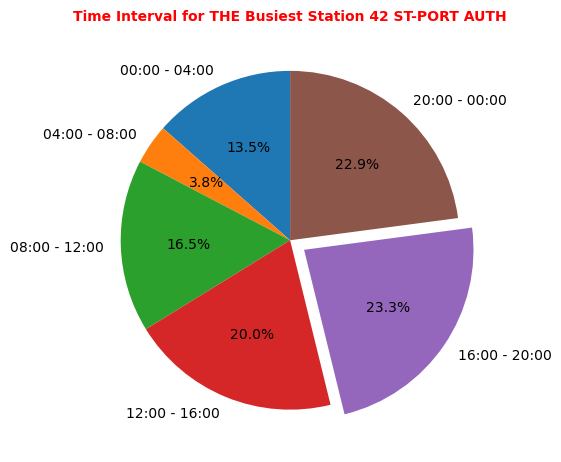

In [65]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [118820, 33597, 145021, 176398, 204668 ,201610]
explode = (0, 0, 0, 0, 0.1 ,0)  
ax1.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for THE Busiest Station 42 ST-PORT AUTH", weight="bold", c="red", fontsize=10)
plt.show()

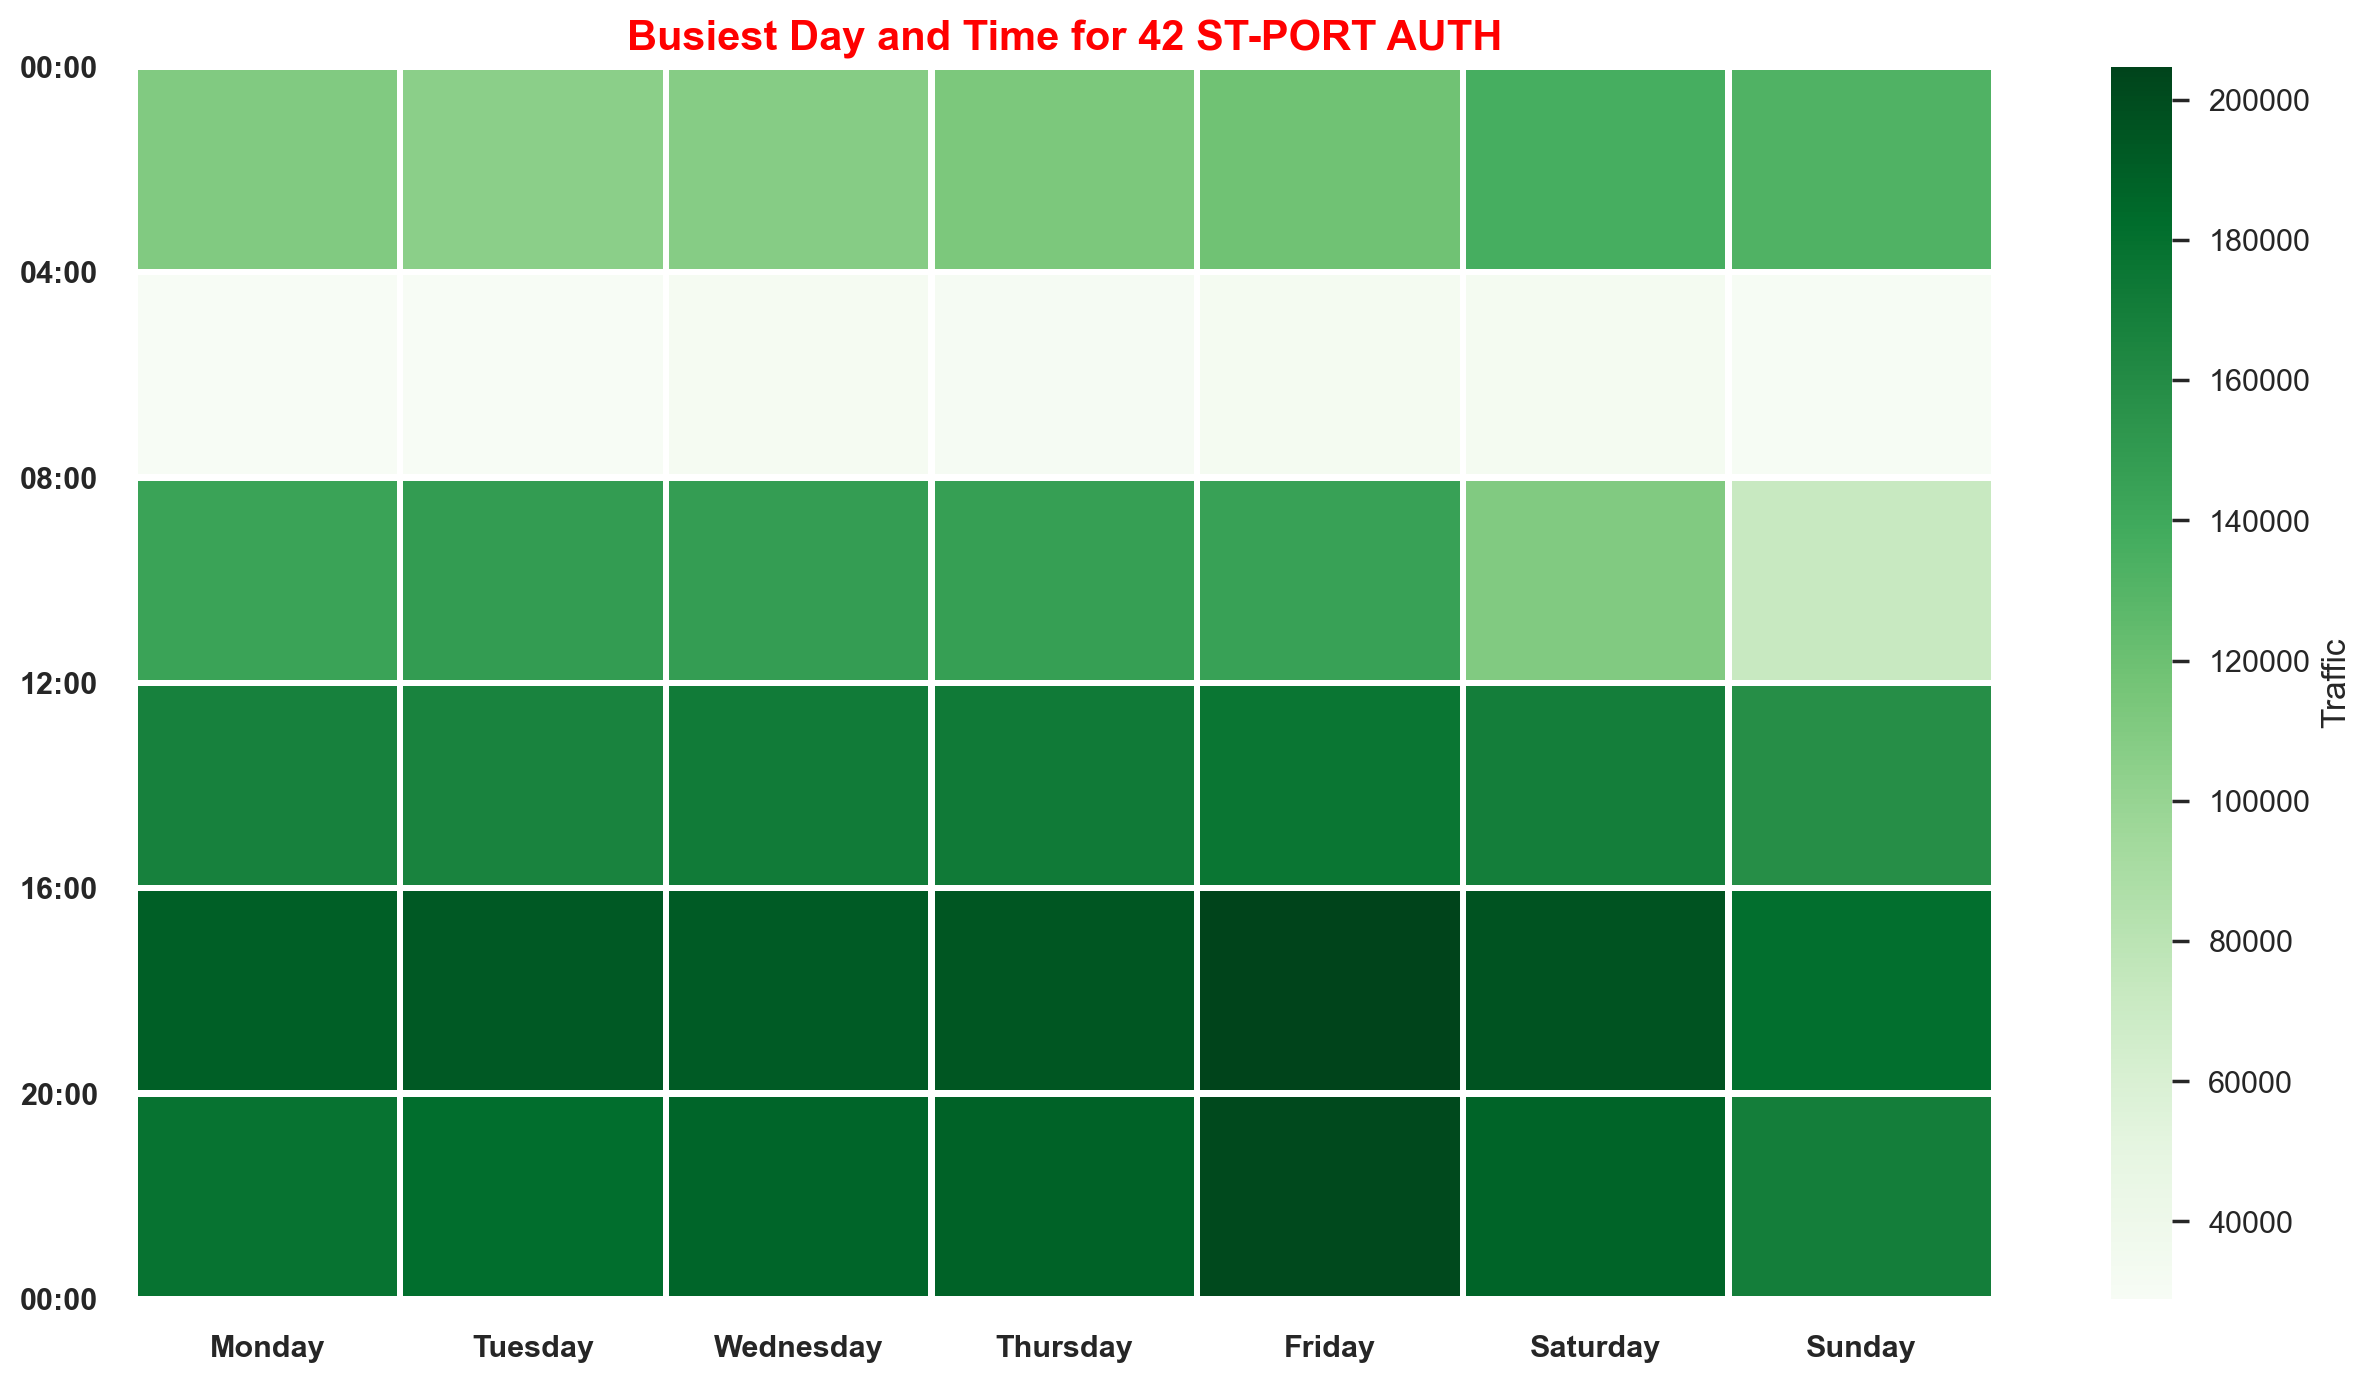

In [66]:
mta_top1_heatmap_detail = rounded_day_time.groupby(["NAMEOFDAY","TIME"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="TIME", columns="NAMEOFDAY",values="TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 42 ST-PORT AUTH",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.show()